In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import tensorflow as tf

## Import Data

In [3]:
data = pd.read_csv('dataset/train.csv')
data.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [4]:
data.shape

(27481, 4)

In [5]:
eval_data = pd.read_csv('dataset/test.csv')
eval_data.head(5)

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [6]:
eval_data.shape

(3534, 3)

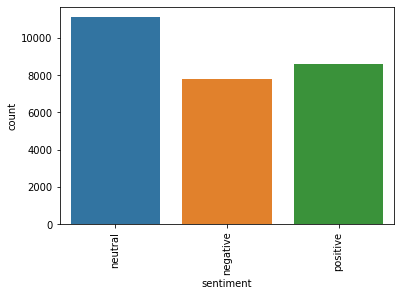

In [7]:
plt.figure()
plt.xticks(rotation = 90)
sns.countplot(data['sentiment'])

## Cleaning

### Steps:

1. Remove Urls in text column
2. Check spaces at the beginning and end of the string, then remove them.
3. Remove null or 0 length strings
4. Lowercase all text.
5. Remove Punctuations, brackets and hyphenated characters**
6. Tokenize Text**
7. Replace ` with '
8. Remove # from hashtags**

<i>** Will be taken care by Keras Tokenizer</i>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
textID           27481 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27481 non-null object
dtypes: object(4)
memory usage: 858.9+ KB


In [9]:
def removeSpaces(stringval):
    stringval = str(stringval)
    while stringval[0] == " ":
        stringval = stringval[1:]
    while stringval[-1] == " ":
        stringval = stringval[:-1]
    return stringval

data['text'] = data['text'].apply(lambda row: removeSpaces(row))
eval_data['text'] = eval_data['text'].apply(lambda row: removeSpaces(row))

In [10]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on th...","Sons of ****,",negative


In [11]:
#Check & Remove rows with 0 length strings
print(data[data['text'].isnull()])
data = data[data['text'].isnull() == False]

print(eval_data[eval_data['text'].isnull()])

Empty DataFrame
Columns: [textID, text, selected_text, sentiment]
Index: []
Empty DataFrame
Columns: [textID, text, sentiment]
Index: []


In [12]:
#Convert all text to lowercase
def to_lowercase(text):
    text= text.lower()
    return text

data['text'] = data['text'].apply(lambda x: to_lowercase(x))
eval_data['text'] = eval_data['text'].apply(lambda x: to_lowercase(x))
data.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"sons of ****, why couldn`t they put them on th...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,soooo high,Soooo high,neutral
8,e050245fbd,both of you,Both of you,neutral
9,fc2cbefa9d,journey!? wow... u just became cooler. hehe.....,Wow... u just became cooler.,positive


In [13]:
#remove url links beginning with http...
def remove_url(text):
    words = text.split()
    for idx, val in enumerate(words):
        if (('https://' in val) | ('http://' in val)):
            words.remove(val)
    clean_text = ' '.join(words)
    clean_text = removeSpaces(clean_text)
    return clean_text

data['text'] = data['text'].apply(lambda row: remove_url(row))
eval_data['text'] = eval_data['text'].apply(lambda row: remove_url(row))

print(data[data['text'].isnull()])
data = data[data['text'].isnull() == False]

print(eval_data[eval_data['text'].isnull()])

Empty DataFrame
Columns: [textID, text, selected_text, sentiment]
Index: []
Empty DataFrame
Columns: [textID, text, sentiment]
Index: []


In [14]:
data.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",neutral
1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"sons of ****, why couldn`t they put them on th...","Sons of ****,",negative
5,28b57f3990,- some shameless plugging for the best rangers...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,soooo high,Soooo high,neutral
8,e050245fbd,both of you,Both of you,neutral
9,fc2cbefa9d,journey!? wow... u just became cooler. hehe......,Wow... u just became cooler.,positive


In [15]:
#Replace apostrophe ' instead of `
def replace_ap(text):
    words = text.split()
    for idx, val in enumerate(words):
        if len(val)>1:
            val = val.replace('`','\'')
            words[idx] = val
    clean_text = ' '.join(words)
    return clean_text


data['text'] = data['text'].apply(lambda row: replace_ap(row))
eval_data['text'] = eval_data['text'].apply(lambda row: replace_ap(row))

In [16]:
data['text'].iloc[0]

"i'd have responded, if i were going"

##### Remove Stopwords

In [17]:
#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

def remove_sw(line):
  for word in stopwords:
    token = " "+word+" "
    line.replace('token', " ")
    line.replace("  "," ")
  return line

data['text'] = data['text'].apply(lambda row: remove_sw(row))
eval_data['text'] = eval_data['text'].apply(lambda row: remove_sw(row))

##### Create WordClouds

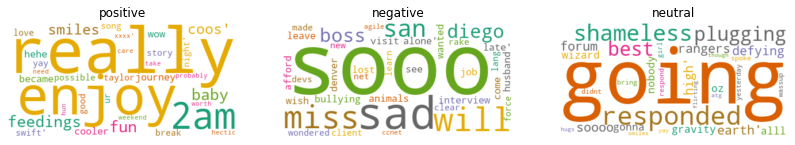

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42,
    stopwords = STOPWORDS)

plt.figure(figsize = (14,7))
for index, cat in enumerate(['positive','negative','neutral']):
    
    wordcloud.generate(str(data[data['sentiment']==cat]['text'].values))
    
    plt.subplot(1, 3, index+1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(cat)
    
plt.show()

### Tokenize

In [19]:
data.shape

(27481, 4)

In [20]:
data['text'].iloc[0:10]

0                  i'd have responded, if i were going
1        sooo sad i will miss you here in san diego!!!
2                            my boss is bullying me...
3                       what interview! leave me alone
4    sons of ****, why couldn't they put them on th...
5    - some shameless plugging for the best rangers...
6    2am feedings for the baby are fun when he is a...
7                                           soooo high
8                                          both of you
9    journey!? wow... u just became cooler. hehe......
Name: text, dtype: object

In [21]:
# Create lists
train_sentences = data['text'].to_numpy()
train_labels = data['sentiment'].to_numpy()

val_sentences = eval_data['text'].to_numpy()
val_labels = eval_data['sentiment'].to_numpy()

In [22]:
#Tokenize train sentences

#Keras tokenizer removes puctuation marks

tokenizer =Tokenizer(filters = '!"#$%&()+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(train_sentences)

total_words = len(tokenizer.word_index) + 1
sequences = np.array(tokenizer.texts_to_sequences(train_sentences))
word_index = tokenizer.word_index
max_seq_len = max([len(seq) for seq in sequences])

input_sequences = np.array(pad_sequences(sequences,maxlen=max_seq_len,padding='post'))

In [23]:
# Tokenize validation sentences
val_sequences  = np.array(tokenizer.texts_to_sequences(val_sentences))
val_padded = np.array(pad_sequences(val_sequences,maxlen=max_seq_len,padding='post'))

In [24]:
#Tokenize labels in both train and validation sets
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(val_labels))

In [25]:
np.unique(validation_label_seq)

array([1, 2, 3])

### Saving

#### Saving the tokenizer

In [26]:
import pickle

with open('Tokenizer/tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f, protocol= pickle.HIGHEST_PROTOCOL)

with open('Tokenizer/label_tokenizer.pickle', 'wb') as f:
    pickle.dump(label_tokenizer, f, protocol = pickle.HIGHEST_PROTOCOL)

#### Saving as tfRecord

In [27]:
from tfrecord_io import write_tfr_batches
#funcs.sequence_to_tfexample(sequence=[1,2,3], sentiment=[1])
write_tfr_batches(val_padded,validation_label_seq,
                      batch_size = 3534, num_batches = 1 , 
                      savepath = 'dataset/', dataset_type='val')

In [28]:
write_tfr_batches(input_sequences,training_label_seq,
                      batch_size = 3141, num_batches = 8 , 
                      savepath = 'dataset/', dataset_type='train')

In [29]:
test_data = val_padded[-250:]
test_labels = validation_label_seq[-250:]

np.save('dataset/test_data.npy', test_data)
np.save('dataset/test_labels.npy', test_labels)